In [12]:
import os
import pandas as pd
import pickle
import numpy as np

def load_subject_data(subject_path):
    # Load and preprocess data for a single subject
    with open(os.path.join(subject_path, f'{os.path.basename(subject_path)}.pkl'), 'rb') as file:
        subject_data = pickle.load(file, encoding='latin1')
    
    # Extract signals and labels
    signals = subject_data['signal']
    labels = subject_data['label']
    
    # Initialize DataFrame for signals
    df_signals = pd.DataFrame()
    
    # Loop through each sensor type (chest, wrist) and process the signals
    for sensor_type in signals:
        sensor_data = signals[sensor_type]
        
        # Loop through each type of signal in the sensor (e.g., ECG, EDA)
        for signal_type in sensor_data:
            signal_values = sensor_data[signal_type]
            if signal_values.ndim > 1:
                signal_df = pd.DataFrame(signal_values)
                signal_df.columns = [f"{sensor_type}_{signal_type}_{i}" for i in range(signal_df.shape[1])]
            else:
                signal_df = pd.DataFrame(signal_values, columns=[f"{sensor_type}_{signal_type}"])
            
            df_signals = pd.concat([df_signals, signal_df], axis=1)
    
    # Add labels to DataFrame
    df_signals['Stress_Level'] = labels
    
    return df_signals

# Change this path to the location where your WESAD data is stored
data_path = "C:\\Users\\admin\\Documents\\stress_factor\\WESAD"
subjects = [f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]

# Process each subject's data and save to disk
for subject in subjects:
    subject_path = os.path.join(data_path, subject)
    subject_data = load_subject_data(subject_path)
    if not subject_data.empty:
        subject_data.to_csv(f"{subject}_processed.csv", index=False)
        print(f"Processed data for {subject} saved.")

print("Data processing for all subjects completed.")


Processed data for S10 saved.
Processed data for S11 saved.
Processed data for S13 saved.
Processed data for S14 saved.
Processed data for S15 saved.
Processed data for S16 saved.
Processed data for S17 saved.
Processed data for S2 saved.
Processed data for S3 saved.
Processed data for S4 saved.
Processed data for S5 saved.
Processed data for S6 saved.
Processed data for S7 saved.
Processed data for S8 saved.
Processed data for S9 saved.
Data processing for all subjects completed.


In [2]:
# Import necessary libraries
import pandas as pd
import os

# Load all processed CSVs and combine them into one DataFrame
combined_data = pd.DataFrame()

# Set the path to where the processed subject CSV files are saved
data_path = "C:\\Users\\admin\\Documents\\stress_factor\\WESAD"

# List all subject directories (assuming each subject data is in a folder with its name)
subjects = [f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]

# Process each subject's CSV file and append to combined data
for subject in subjects:
    subject_file = f"{subject}_processed.csv"
    subject_df = pd.read_csv(subject_file)
    combined_data = pd.concat([combined_data, subject_df], ignore_index=True)

# Save combined data to a CSV file
combined_data.to_csv("combined_stress_data.csv", index=False)
print("All subject data combined and saved to combined_stress_data.csv.")


All subject data combined and saved to combined_stress_data.csv.


In [1]:
import pandas as pd

# Load combined data
data = pd.read_csv("combined_stress_data.csv")

# Display basic information
print(data.info())
print(data.describe())

# Check for null values
print(data.isnull().sum())

# Display the first few rows
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60807600 entries, 0 to 60807599
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   chest_ACC_0   float64
 1   chest_ACC_1   float64
 2   chest_ACC_2   float64
 3   chest_ECG_0   float64
 4   chest_EMG_0   float64
 5   chest_EDA_0   float64
 6   chest_Temp_0  float64
 7   chest_Resp_0  float64
 8   wrist_ACC_0   float64
 9   wrist_ACC_1   float64
 10  wrist_ACC_2   float64
 11  wrist_BVP_0   float64
 12  wrist_EDA_0   float64
 13  wrist_TEMP_0  float64
 14  Stress_Level  int64  
dtypes: float64(14), int64(1)
memory usage: 6.8 GB
None
        chest_ACC_0   chest_ACC_1   chest_ACC_2   chest_ECG_0   chest_EMG_0  \
count  6.080760e+07  6.080760e+07  6.080760e+07  6.080760e+07  6.080760e+07   
mean   8.116865e-01 -4.424838e-02 -2.590081e-01  1.064648e-03 -3.038247e-03   
std    1.312529e-01  1.038886e-01  3.321664e-01  2.686881e-01  1.790485e-02   
min   -6.600000e+00 -6.600000e+00 -6.600000e+00 -1.500

In [2]:
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values (or use imputation if needed)
data = data.dropna()

# Separate features and target variable
X = data.drop(columns=["Stress_Level"])
y = data["Stress_Level"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


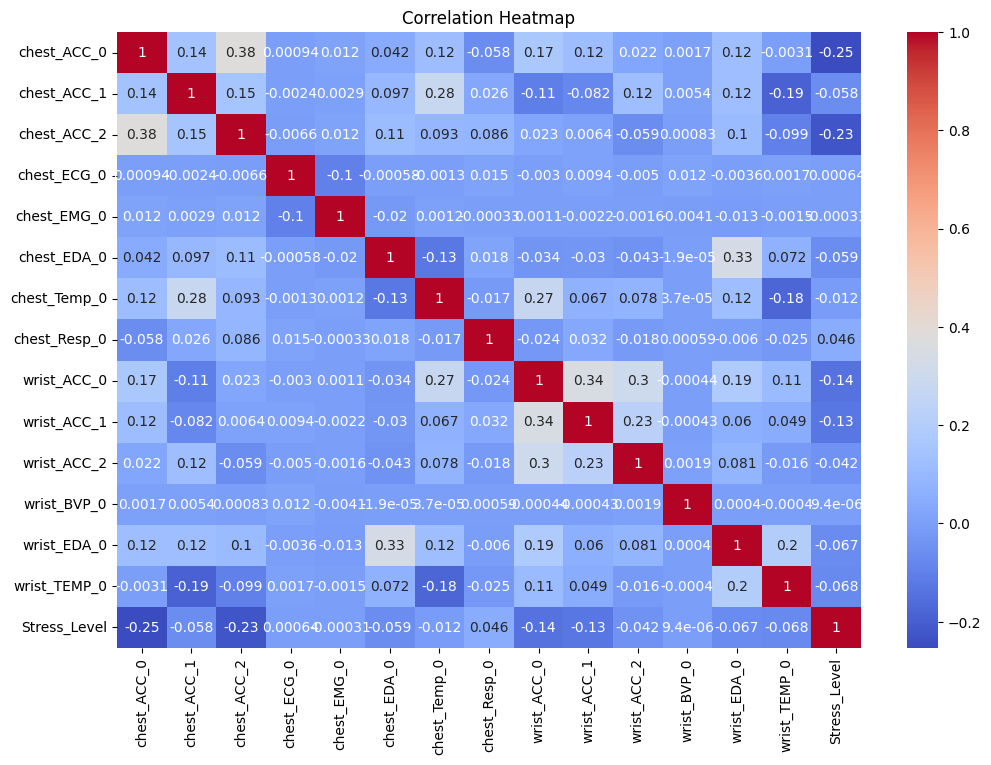

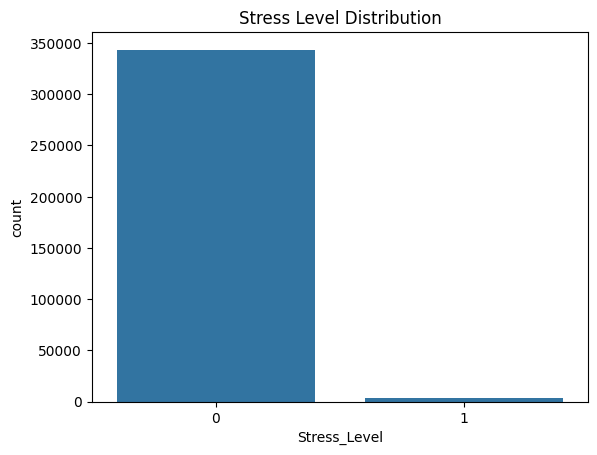

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Histogram of Stress Levels
sns.countplot(x=y)
plt.title("Stress Level Distribution")
plt.show()


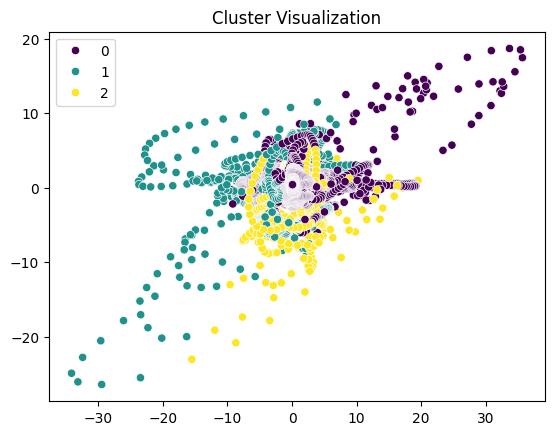

In [4]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
data["Cluster"] = clusters

# Visualize clusters
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette="viridis")
plt.title("Cluster Visualization")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9999520346885132
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103112
           1       1.00      1.00      1.00      1130

    accuracy                           1.00    104242
   macro avg       1.00      1.00      1.00    104242
weighted avg       1.00      1.00      1.00    104242



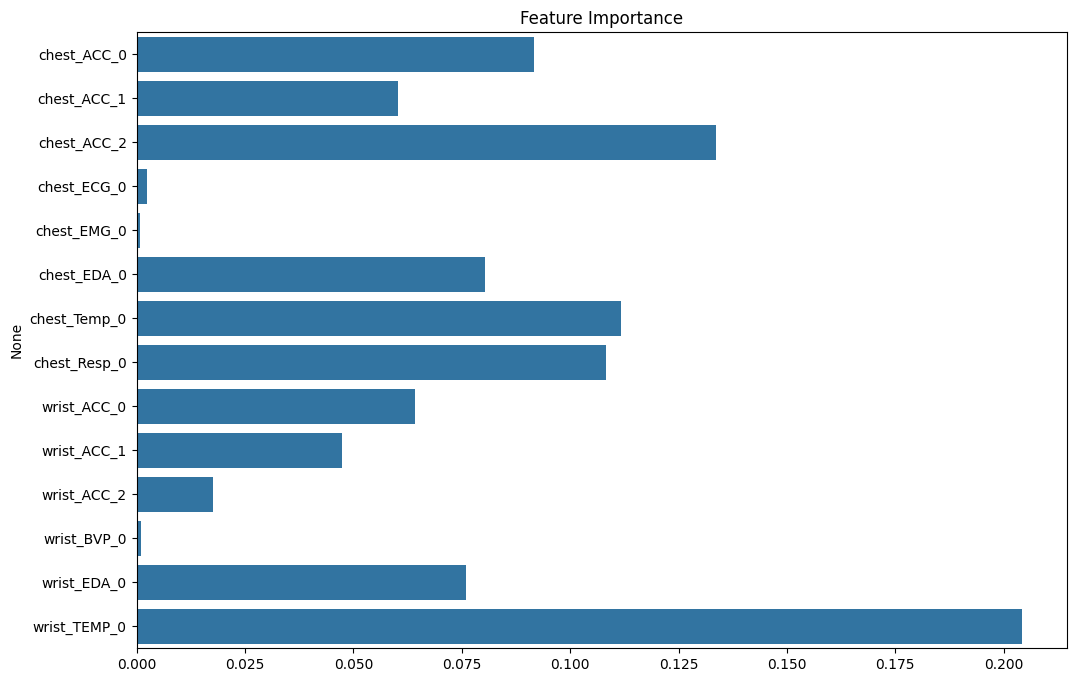

In [6]:
# Feature importance
importances = model.feature_importances_
feature_names = data.columns[:-2]  # Assuming the last two columns are target and cluster

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()


In [7]:
import joblib

# Save model
joblib.dump(model, "stress_prediction_model.pkl")
print("Model saved as stress_prediction_model.pkl")


Model saved as stress_prediction_model.pkl
